In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from pyace import *

Read original dataset

In [4]:
df=pd.read_pickle("../Cu-II/Cu_df2_1k.pkl.gzip",compression="gzip")

In [5]:
df

,name,ase_atoms,energy_corrected,forces,energy_corrected_per_atom
0,A1:FHI-aims/PBE/tight:elastic:s_e_0,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.699843,"[[0.0, 0.0, 0.0]]",-3.699843
1,A1:FHI-aims/PBE/tight:murnaghan:strain_1_0,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.699841,"[[0.0, 0.0, 0.0]]",-3.699841
2,A1:FHI-aims/PBE/tight:phonon:supercell_phonon_0,"(Atom('Cu', [4.3368086899420173e-19, 0.0070709...",-236.789603,"[[-1.13852957740976e-06, -0.0464638907314277, ...",-3.699838
3,A1:FHI-aims/PBE/tight:murnaghan:strain_1_02,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.697932,"[[0.0, 0.0, 0.0]]",-3.697932
4,A1:FHI-aims/PBE/tight:qha:phonopy_strain_1_02:...,"(Atom('Cu', [0.0, 0.007070999999999999, 0.0070...",-236.667372,"[[-1.7950713845026e-06, -0.0426786586259085, -...",-3.697928
...,...,...,...,...,...
995,Zr4Al3,"(Atom('Cu', [1.397, 0.806558, 0.0], index=0), ...",-18.922813,"[[-6.18422096975777e-08, 3.90650715661433e-08,...",-2.703259
996,fcc_100surf_X110_Y-110_Z001_4at_d0.95,"(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C...",-10.811770,"[[-4.30878346990838e-07, -7.31495829958533e-08...",-2.702942
997,ran2.7197,"(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C...",-5.405739,"[[-0.233777024216308, -0.488775610406501, 0.45...",-2.702869
998,A15.shakesmallsuper2.14,"(Atom('Cu', [19.532944999999994, -0.449866, 19...",-172.952480,"[[0.872967501214253, 0.798687481685555, 0.8365...",-2.702382


# Visualize energy and forces distribution

Text(0.5, 0, 'E, eV/atom')

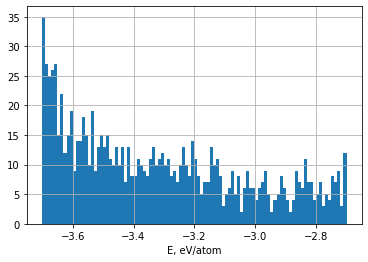

In [6]:
df["energy_corrected_per_atom"].hist(bins=100);
plt.xlabel("E, eV/atom")

Stack forces of all atoms in dataset

In [7]:
forces=np.vstack(df["forces"])
forces.shape

(11309, 3)

Text(0.5, 0, 'F, eV/A')

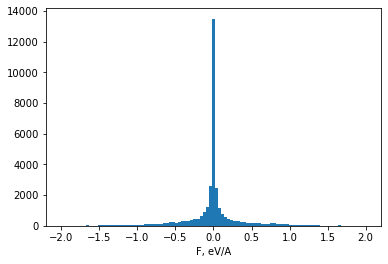

In [8]:
plt.hist(forces.flatten(),
         bins=np.linspace(-2,2,100));
plt.xlabel("F, eV/A")

# Subset selection

## FCC-related only

select all structures where `name` contains "fcc"

In [9]:
fcc_related_mask = df["name"].str.contains("fcc")

In [11]:
df_selected = df[fcc_related_mask]

In [12]:
df_selected.shape

(410, 5)

Save selected dataset to the new file

In [26]:
df_selected.to_pickle("Cu-fcc-only.pckl.gzip",compression="gzip")

## Structures up-to 0.5 eV/atom above minimum

In [13]:
e_min = df["energy_corrected_per_atom"].min()
print("e_min = {} eV/atom".format(e_min))

e_min = -3.699842546498985 eV/atom


In [14]:
below_3eV_mask = df["energy_corrected_per_atom"]<=e_min + 0.5

In [15]:
df_selected = df[below_3eV_mask]
df_selected.shape

(675, 5)

Save selected dataset to the new file

In [16]:
df_selected.to_pickle("Cu-0.5eV.pckl.gzip", compression="gzip")

## Exclude all 'shake' structures

select all structures where `name` DOES NOT contain "shake"

In [17]:
df_selected = df[~df["name"].str.contains("shake")]
df_selected.shape

(668, 5)

Save selected dataset to the new file

In [18]:
df_selected.to_pickle("Cu-no-shake.pckl.gzip", compression="gzip")